In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# yellow_taxi = pd.read_parquet('../Data/yellow_taxi_clean.parquet')

Función `range_data` extrae un rango de archivos Parquet y los carga como DataFrames. Los parametros solicitados son:
- `url_trim` Porción de la url que se mantiene invariable
- `start_m` Mes del intervalo inferior
- `start_y` Año del intervalo inferior
- `end_m` Mes del intervalo superior
- `end_y` Año del intervalo superior

In [2]:
def downloaddf(url_trim:str,month:int,year:int):
    if len (str(int(month)))==1:
        month='0'+str(month)
    return  pd.read_parquet(url_trim+str(year)+'-'+str(month)+'.parquet')

def range_data(url_trim:str,start_m:int, start_y:int, end_m:int, end_y:int):
    if end_y - start_y < 0:
        return 'Error:  End Year is smaller than Start Year'
    elif end_y ==  start_y and end_m < start_m:
        return 'Error:  End Month is smaller than or equal to Start Month'
    elif start_m > 12 or end_m > 12:
        return 'Error: End Month or  Start Month is larger than 12'
    elif end_y ==  start_y and end_m == start_m:
        return downloaddf(url_trim,start_m,start_y)
    elif end_y == start_y:
        df1 =downloaddf(url_trim,start_m,start_y)
        for i in range(start_m + 1,end_m + 1):
            df2 =downloaddf(url_trim,i,start_y)
            df1 = pd.concat([df1,df2],ignore_index=True)
            del df2
        return df1
    elif  end_y > start_y:
        df1 =downloaddf(url_trim,start_m,start_y)
        for j in range(start_y ,end_y + 1):
            for k in range(start_m + 1,13):
                if  j==end_y and  k > end_m :break
                df2 =downloaddf(url_trim,k,j)
                df1 = pd.concat([df1,df2],ignore_index=True)
                del df2
            start_m  = 1
        return df1

## Yellow Taxi

Carga del conjunto de datos para `Yellow Taxi` comprendidos entre Diciembre del 2023 a Febrero del 2024 (Últimos tres meses)

In [14]:
url_trim = 'https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_20'
yellow_taxi = range_data(url_trim,12,23,2,24)

Descarga alternativa del datos

In [19]:
df1 = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-12.parquet')
df2 = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2024-01.parquet')
df3 = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2024-02.parquet')
yellow_taxi = pd.concat([df1,df2,df3],ignore_index=True)

Identificadores de zona de NYC

In [20]:
url_zonas = 'https://d37ci6vzurychx.cloudfront.net/misc/taxi_zone_lookup.csv'
zonas = pd.read_csv(url_zonas)

Descripción general de los datos

In [21]:
yellow_taxi.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
count,9.348717e+06,9348717,9348717,8.842942e+06,9.348717e+06,8.842942e+06,9.348717e+06,9.348717e+06,9.348717e+06,9.348717e+06,9.348717e+06,9.348717e+06,9.348717e+06,9.348717e+06,9.348717e+06,9.348717e+06,8.842942e+06,8.842942e+06
mean,1.753031e+00,2024-01-14 17:58:26.016412,2024-01-14 18:15:05.110460,1.359922e+00,3.728006e+00,1.984252e+00,1.655403e+02,1.644876e+02,1.155901e+00,1.867278e+01,1.458920e+00,4.832077e-01,3.390681e+00,5.386832e-01,9.756327e-01,2.737301e+01,2.264431e+00,1.358217e-01
min,1.000000e+00,2002-12-31 22:16:54,2002-12-31 23:05:41,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-1.087300e+03,-3.917000e+01,-5.000000e-01,-1.400000e+02,-8.000000e+01,-1.000000e+00,-1.094050e+03,-2.500000e+00,-1.750000e+00
25%,2.000000e+00,2023-12-19 21:07:47,2023-12-19 21:22:47,1.000000e+00,1.000000e+00,1.000000e+00,1.320000e+02,1.140000e+02,1.000000e+00,8.940000e+00,0.000000e+00,5.000000e-01,5.000000e-01,0.000000e+00,1.000000e+00,1.560000e+01,2.500000e+00,0.000000e+00
50%,2.000000e+00,2024-01-15 09:25:06,2024-01-15 09:38:29,1.000000e+00,1.700000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.350000e+01,1.000000e+00,5.000000e-01,2.720000e+00,0.000000e+00,1.000000e+00,2.053000e+01,2.500000e+00,0.000000e+00
75%,2.000000e+00,2024-02-07 18:02:34,2024-02-07 18:18:48,1.000000e+00,3.160000e+00,1.000000e+00,2.340000e+02,2.340000e+02,1.000000e+00,2.120000e+01,2.500000e+00,5.000000e-01,4.260000e+00,0.000000e+00,1.000000e+00,2.976000e+01,2.500000e+00,0.000000e+00
max,6.000000e+00,2024-03-01 00:01:37,2024-03-01 23:24:42,9.000000e+00,3.127223e+05,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,9.792000e+03,5.168000e+01,4.217000e+01,4.174000e+03,1.613800e+02,1.000000e+00,9.792000e+03,2.500000e+00,1.750000e+00
std,4.329297e-01,NaN,NaN,8.679405e-01,2.134680e+02,9.396248e+00,6.397903e+01,6.943447e+01,5.895038e-01,1.886865e+01,1.805313e+00,1.187837e-01,4.196559e+00,2.152009e+00,2.180925e-01,2.343495e+01,8.145729e-01,4.789160e-01


En esta primera inspección pueden visualzarse registros fuera del rango temporal analizado

In [22]:
yellow_taxi[yellow_taxi['tpep_pickup_datetime'].dt.year < 2023]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
1128759,2,2002-12-31 22:16:54,2003-01-01 15:02:08,1.0,3.25,1.0,N,132,10,1,14.9,1.75,0.5,3.63,0.00,1.0,21.78,0.0,0.00
2531205,2,2002-12-31 23:03:18,2003-01-01 21:09:44,1.0,28.19,2.0,N,132,13,1,70.0,0.00,0.5,16.54,6.94,1.0,99.23,2.5,1.75
2601397,2,2009-01-01 00:02:41,2009-01-01 17:43:28,1.0,1.37,1.0,N,230,142,1,10.7,0.00,0.5,1.47,0.00,1.0,16.17,2.5,0.00
3387482,2,2009-01-01 23:58:40,2009-01-02 00:01:40,1.0,0.46,1.0,N,137,264,2,4.4,3.50,0.5,0.00,0.00,1.0,9.40,0.0,0.00
3429686,2,2002-12-31 22:59:39,2002-12-31 23:05:41,1.0,0.63,1.0,N,170,170,3,-6.5,0.00,-0.5,0.00,0.00,-1.0,-10.50,-2.5,0.00
3429687,2,2002-12-31 22:59:39,2002-12-31 23:05:41,1.0,0.63,1.0,N,170,170,3,6.5,0.00,0.5,0.00,0.00,1.0,10.50,2.5,0.00
4606736,2,2009-01-01 23:30:39,2009-01-02 00:01:39,1.0,10.99,1.0,N,237,264,2,45.0,3.50,0.5,0.00,0.00,1.0,50.00,0.0,0.00
5934623,2,2009-01-01 00:24:09,2009-01-01 01:13:00,2.0,10.88,1.0,N,138,264,2,50.6,9.25,0.5,0.00,6.94,1.0,68.29,0.0,0.00
6522474,2,2008-12-31 22:52:49,2008-12-31 23:04:09,1.0,1.62,1.0,N,141,211,1,11.4,2.50,0.5,2.00,0.00,1.0,19.90,2.5,0.00
7240044,2,2009-01-01 00:02:13,2009-01-01 00:48:28,1.0,0.57,1.0,N,79,148,1,9.3,1.00,0.5,2.86,0.00,1.0,17.16,2.5,0.00


Eliminando registros fuera del rango temporal

In [23]:
yellow_taxi = yellow_taxi[yellow_taxi['tpep_pickup_datetime'].dt.year >= 2023]

El rango temporal es de 92 días (Aproximadamente 3 meses)

In [24]:
print(yellow_taxi['tpep_pickup_datetime'].dt.date.max() - yellow_taxi['tpep_pickup_datetime'].dt.date.min())

92 days, 0:00:00


El conjunto de datos contiene un total de 6 384 088 de registros nulos

In [25]:
yellow_taxi.isna().count()

VendorID                 9348707
tpep_pickup_datetime     9348707
tpep_dropoff_datetime    9348707
passenger_count          9348707
trip_distance            9348707
RatecodeID               9348707
store_and_fwd_flag       9348707
PULocationID             9348707
DOLocationID             9348707
payment_type             9348707
fare_amount              9348707
extra                    9348707
mta_tax                  9348707
tip_amount               9348707
tolls_amount             9348707
improvement_surcharge    9348707
total_amount             9348707
congestion_surcharge     9348707
Airport_fee              9348707
dtype: int64

Eliminando registros nulos

In [26]:
yellow_taxi = yellow_taxi.dropna()

### Variables
#### Variables cualitativas

1. `VendorID`. Identificador del proveedor del Taxicab Technology Service Provider (TPEP), el cual puede presentar solo dos ID´s:
- 1= Creative Mobile Technologies, LLC
- 2= VeriFone Inc.

2. `RateCodeID`. Identificador de tarifa vigente al finalizar el viaje. Puede tomar los siguientes valores:
- 1=Tarifa estándar
- 2=JFK
- 3=Newark
- 4=Nassau o Westchester
- 5=Tarifa negociada
- 6=Tarifa grupal

3. `Store_and_fwd_flag`. Esta variable indica si el registro se almaceno en el vehiculo para posteriormente enviarse al servidor. Debido a conectividad. Puede tomar los Valores (Y= Almacenado y posterior envio, N= No almacenado, se envio al servidor)
4. `PULocationID`. Zona dónde se inicio el Taximetro, las zonas se segmentan con valores enteros que van del 1 al 265, (consulte el DataFrame `zonas`)

5. `DOLocationID`. Zona dónde se finalizo el Taximetro (Consulte DataFrame Zonas)

6. `payment_type`. Tipo de pago, los valores pueden ser:
- 1= Tarjeta de crédito
- 2= Efectivo
- 3= Sin cargo
- 4= Disputa
- 5= Desconocido
- 6= Viaje anulado

El proveedor de TPEP con mayor presencia (`VendorID`) es VeriFone Inc. ya que el 75% de los registros provienen de ellos

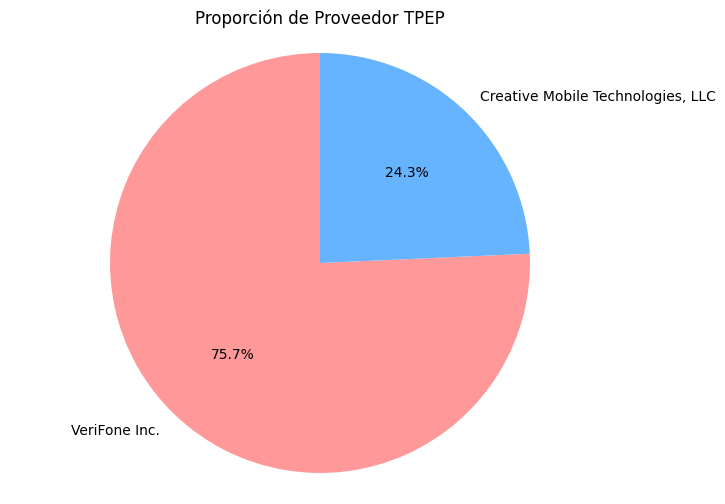

In [27]:
# Datos
vendor = {1:'Creative Mobile Technologies, LLC', 2:'VeriFone Inc.'}
vendor_counts = list(yellow_taxi['VendorID'].value_counts())
labels = ['VeriFone Inc.', 'Creative Mobile Technologies, LLC']
colors = ['#FF9999', '#66B3FF']

# Crear la gráfica circular
plt.figure(figsize=(8, 6))
plt.pie(vendor_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Proporción de Proveedor TPEP')
plt.axis('equal')  # Aspecto igual para que sea un círculo

# Mostrar la gráfica
plt.show()


La tarifa identificada con el número `99`, que no figura en la documentación oficial, resalta por ser la **tercera más frecuente** en el uso durante los últimos tres meses. Es esencial prestar atención a esta tarifa debido a su inesperada alta incidencia.

In [29]:
yellow_taxi['RatecodeID'].value_counts()

RatecodeID
1.0     8345859
2.0      307115
99.0      82021
5.0       61686
3.0       27015
4.0       19222
6.0          14
Name: count, dtype: int64

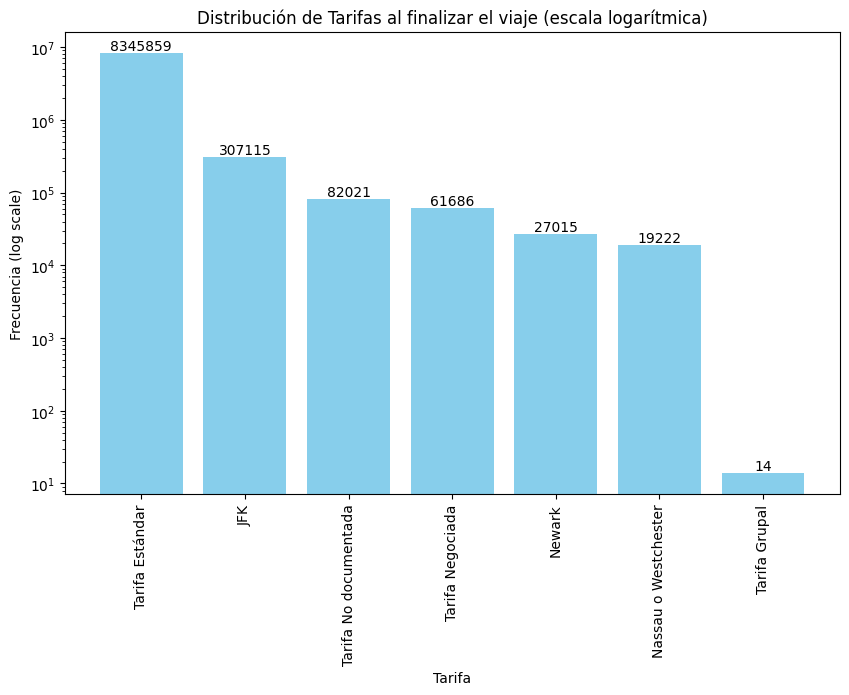

In [30]:
ratecode_counts = yellow_taxi['RatecodeID'].value_counts()
RCID = {1:'Tarifa Estándar',2:'JFK',3:'Newark',4:'Nassau o Westchester',5:'Tarifa Negociada',6:'Tarifa Grupal',99:'Tarifa No documentada'}
# Ahora, crearemos una lista de etiquetas basadas en el diccionario RCID para las barras del histograma.
labels = [RCID[id] if id in RCID else 'Other' for id in ratecode_counts.index]

# Crear el histograma con escala logarítmica en el eje y
plt.figure(figsize=(10, 6))
plt.bar(labels, ratecode_counts.values, color='skyblue')
plt.yscale('log')  # Escala logarítmica en el eje y

# Añadir título y etiquetas
plt.title('Distribución de Tarifas al finalizar el viaje (escala logarítmica)')
plt.xlabel('Tarifa')
plt.ylabel('Frecuencia (log scale)')
plt.xticks(rotation = 90)

# Mostrar las etiquetas en las barras
for i, value in enumerate(ratecode_counts.values):
    plt.text(i, value, str(value), ha='center', va='bottom')

# Mostrar el histograma
plt.show()


La información indica que la gran mayoría de los datos de los viajes en taxi se transmiten justo al finalizar el trayecto, lo cual sugiere que hay una capacidad para realizar un seguimiento en tiempo real. Sin embargo, un pequeño porcentaje, específicamente el **0.4%**, se guarda para enviar más tarde, lo que podría implicar ligeras demoras en la recepción de esos datos. Este patrón de envío de datos refuerza la viabilidad de implementar un sistema de monitoreo en tiempo real para la mayoría de los servicios de taxi.

In [32]:
porcentaje = list(yellow_taxi['store_and_fwd_flag'].value_counts())[1]/(list(yellow_taxi['store_and_fwd_flag'].value_counts())[0]+list(yellow_taxi['store_and_fwd_flag'].value_counts())[1])
print(f"La proporcion de registros almacenados y enviados posteriormente es del {round(porcentaje*100,2)}%")

La proporcion de registros almacenados y enviados posteriormente es del 0.4%


Es interesante observar que la mayoría de los viajes en taxi comienzan en **Manhattan**, **Queens** y **Brooklyn**, lo que no es sorprendente dado que son áreas muy transitadas en la ciudad de Nueva York. Sin embargo, también es relevante notar que existe un volumen significativo de viajes en los que **se desconoce el origen** del viaje. Esto podría deberse a diversas razones, como errores en la recopilación de datos o la falta de información precisa en algunos registros.

In [33]:
# Creando DF que relaciona Zona, Borough, Zona de Servicio y el número de servicios.
ZI = {'LocationID':list(yellow_taxi['PULocationID'].value_counts().index),
      'Número de servicios':list(yellow_taxi['PULocationID'].value_counts())}
ZonaInicio = pd.DataFrame(ZI)
# ZonaInicio.merge(zonas, by)
# zonas['LocationID']
ZonaInicio = pd.merge(ZonaInicio,zonas,on='LocationID', how='inner')

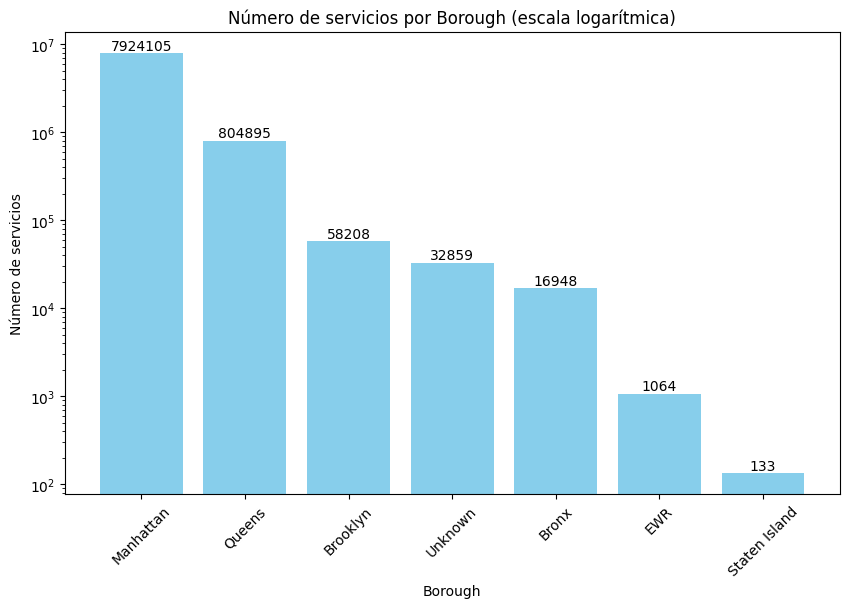

In [34]:
borough_services = ZonaInicio.groupby('Borough')['Número de servicios'].sum().reset_index()

# Ordenar los datos para una mejor visualización
borough_services_sorted = borough_services.sort_values('Número de servicios', ascending=False)

# Crear el histograma con escala logarítmica en el eje y
plt.figure(figsize=(10, 6))
plt.bar(borough_services_sorted['Borough'], borough_services_sorted['Número de servicios'], color='skyblue')
plt.yscale('log')  # Escala logarítmica en el eje y

# Mostrar las etiquetas en las barras
for i, value in enumerate(borough_services_sorted['Número de servicios'].values):
    plt.text(i, value, str(value), ha='center', va='bottom')

# Añadir título y etiquetas
plt.title('Número de servicios por Borough (escala logarítmica)')
plt.xlabel('Borough')
plt.ylabel('Número de servicios')

# Girar las etiquetas del eje x para mejor visualización
plt.xticks(rotation=45)

# Mostrar el histograma
plt.show()


Es notable que los **Yellow Taxis** inician la mayoría de sus servicios en la **Yellow Zone**, con aproximadamente **5 millones de viajes**, lo que indica una alta concentración de actividad en esta área. Por otro lado, los viajes que comienzan en los **aeropuertos** representan alrededor de **470,000**, y en la **Boro Zone**, solo aproximadamente **220,000**. Esto muestra una distribución desigual de los servicios de taxi, con una clara preferencia por la Yellow Zone, probablemente debido a la alta demanda y la facilidad de acceso a pasajeros en esa área. La menor cantidad de servicios que se originan en los aeropuertos y en la Boro Zone podría reflejar una menor demanda y la presencia de otras opciones de transporte en esas zonas.

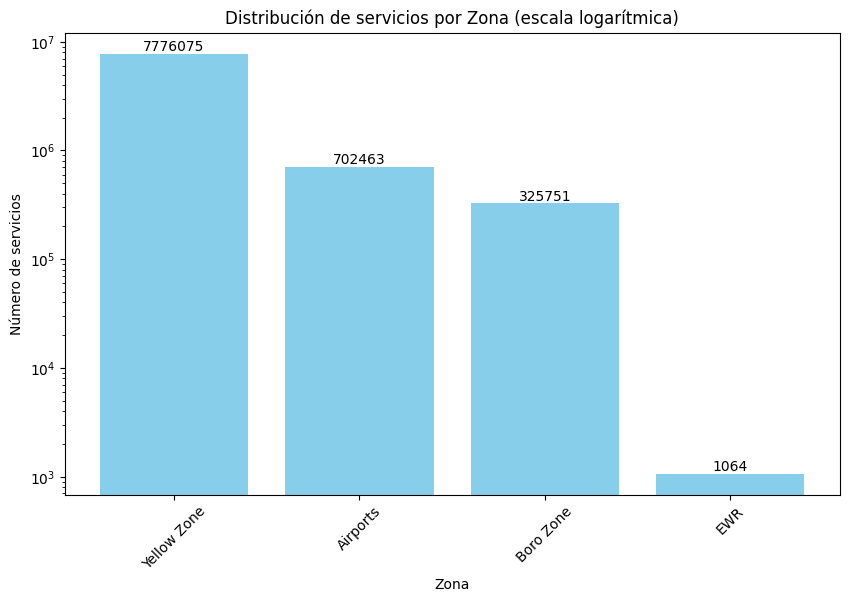

In [36]:
Zona_servicio = ZonaInicio.groupby('service_zone')['Número de servicios'].sum().reset_index()

# Ordenar los datos para una mejor visualización
Zona_servicio_sorted = Zona_servicio.sort_values('Número de servicios', ascending=False)

# Crear el histograma con escala logarítmica en el eje y
plt.figure(figsize=(10, 6))
plt.bar(Zona_servicio_sorted['service_zone'], Zona_servicio_sorted['Número de servicios'], color='skyblue')
plt.yscale('log')  # Escala logarítmica en el eje y

# Mostrar las etiquetas en las barras
for i, value in enumerate(Zona_servicio_sorted['Número de servicios'].values):
    plt.text(i, value, str(value), ha='center', va='bottom')

# Añadir título y etiquetas
plt.title('Distribución de servicios por Zona (escala logarítmica)')
plt.xlabel('Zona')
plt.ylabel('Número de servicios')

# Girar las etiquetas del eje x para mejor visualización
plt.xticks(rotation=45)

# Mostrar el histograma
plt.show()


La siguiente imagen muestra las 10 zonas con más viajes 

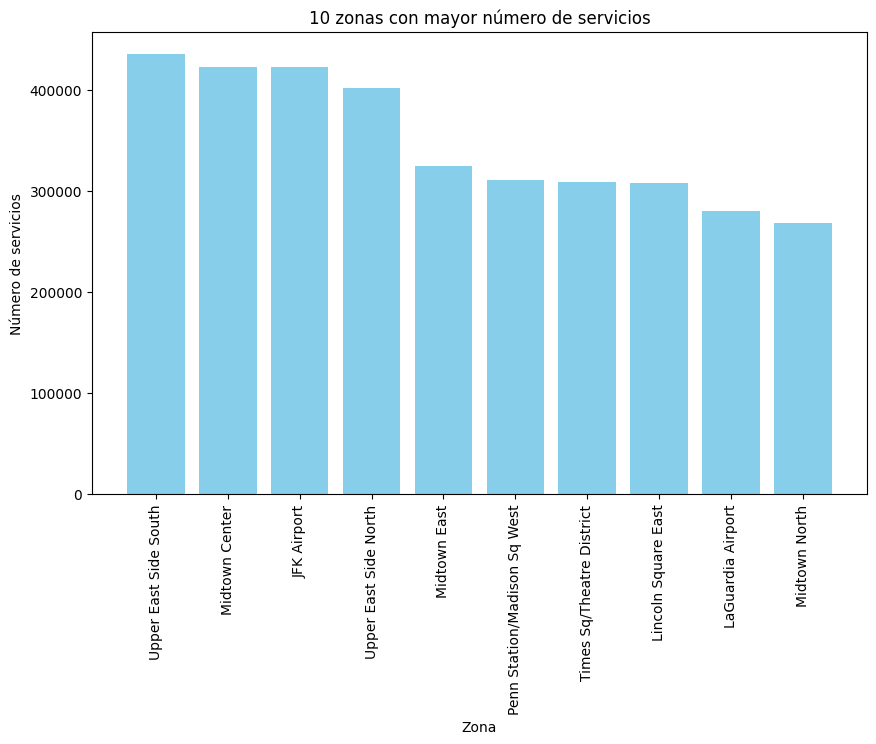

In [37]:
# Cantidad de zonas a mostrar en el gráfico
n = 10
zona_sorted = ZonaInicio[['Zone', 'Número de servicios']].sort_values(by='Número de servicios', ascending=False).head(n)

# Crear el histograma
plt.figure(figsize=(10, 6))
plt.bar(zona_sorted['Zone'].astype(str), zona_sorted['Número de servicios'], color='skyblue')  # Convertir a str

# Añadir título y etiquetas
plt.title(f'{n} zonas con mayor número de servicios')
plt.xlabel('Zona')
plt.ylabel('Número de servicios')

# Girar las etiquetas del eje x para mejor visualización
plt.xticks(rotation=90)

# Mostrar el histograma
plt.show()


Para identificar las rutas más transitadas, se crea la variable `trip_outside_zone`. Esta variable es **TRUE** cuando el destino del viaje es distinto a su punto de partida.

In [38]:
yellow_taxi['trip_outside_zone'] = yellow_taxi['PULocationID'] != yellow_taxi['DOLocationID']

Creando variable `route` la cual define el punto de partida y destino de cada viaje

In [29]:
# Esta celda demora bastante en ejecutare :( Si es localmente :`(, ya que filtra n veces el DF zonas y devuelve la zona al aplicarse el apply 
# en el df yellow taxi.
def idzone2zone(id:int):
    try:
        filtro = zonas[zonas['LocationID'] == id].reset_index()
        return filtro['Zone'].loc[0]
    except:
        return np.nan

yellow_taxi['route'] = yellow_taxi['PULocationID'].apply(idzone2zone) +' -- '+ yellow_taxi['DOLocationID'].apply(idzone2zone)

El gráfico titulado "20 rutas más solicitadas en NYC" muestra las rutas de taxis amarillos en Nueva York que tienen la mayor demanda. Aquí hay un resumen de los puntos clave:

- **Ruta Superior**: La ruta más popular es de **Upper East Side South a Upper East Side North**, lo que indica una alta demanda de viajes dentro de esta área.
- **Rutas Comunes**: Varias rutas conectan **Upper East Side** con **Midtown** y **Lincoln Square**, lo que refleja patrones comunes de desplazamiento.
- **Demanda de Servicios**: Las barras representan el número de servicios, con la ruta más solicitada alcanzando hasta **40,000** servicios.
- **Planificación Urbana**: Este análisis de datos es útil para la **planificación del tráfico** y la **gestión urbana**, ayudando a entender los patrones de movilidad y optimizar los servicios de transporte.

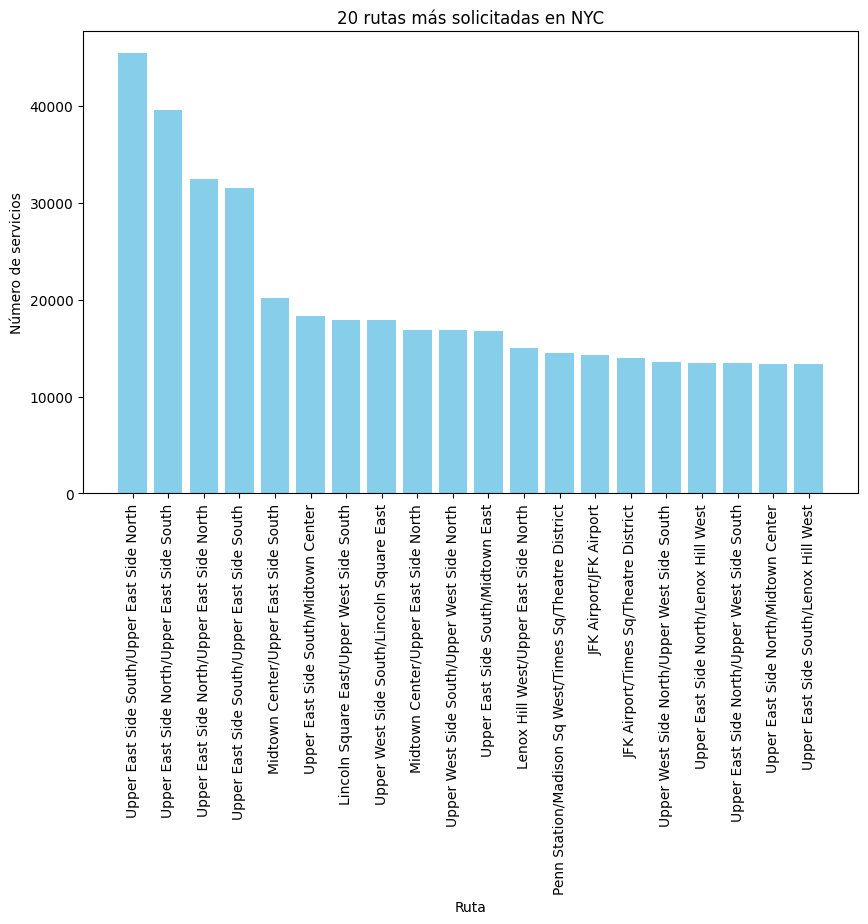

In [19]:
# Cantidad de rutas a mostrar en el gráfico
n = 20
rutas = yellow_taxi.groupby('route')['route'].count().sort_values(ascending=False).head(n)

# Crear el histograma
plt.figure(figsize=(10, 6))
plt.bar(list(rutas.index), list(rutas), color='skyblue')

# Añadir título y etiquetas
plt.title(f'{n} rutas más solicitadas en NYC')
plt.xlabel('Ruta')
plt.ylabel('Número de servicios')

# Girar las etiquetas del eje x para mejor visualización
plt.xticks(rotation=90)

# Mostrar el histograma
plt.show()

El gráfico titulado "Métodos de Pago en Yellow Taxis" muestra las preferencias de pago de los clientes que utilizan taxis:

- **Predominio de Tarjetas**: La **tarjeta de crédito** es el método de pago más utilizado, con una frecuencia de **4,916,587**.
- **Efectivo Sigue Vigente**: El pago en **efectivo** es el segundo más común, con **959,735** transacciones.
- **Menos Disputas y Sin Cargo**: Las categorías de **disputa** y **sin cargo** tienen frecuencias mucho menores, con **100,937** y **41,216** respectivamente.
- **Tendencias de Pago**: Este gráfico muestra una tendencia de pago con tarjeta de crédito.

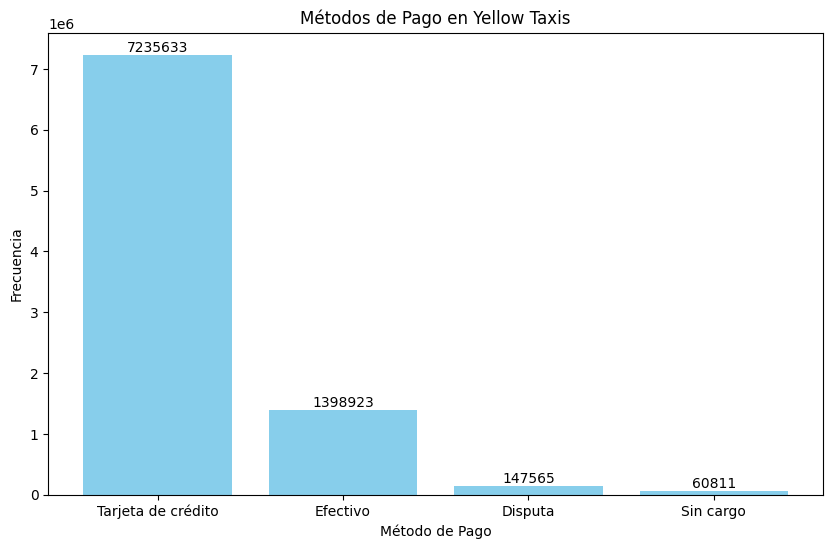

In [39]:
payment_counts = yellow_taxi['payment_type'].value_counts()
payment_method = {1:'Tarjeta de crédito',2:'Efectivo',3:'Sin cargo',4:'Disputa',5:'Desconocido',6:'Viaje anulado'}

# Crear una lista de nombres de métodos de pago basada en el diccionario 'payment_method'
payment_names = [payment_method[payment_id] if payment_id in payment_method else 'Desconocido'
                 for payment_id in payment_counts.index]

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(payment_names, payment_counts.values, color='skyblue')

# Mostrar las etiquetas en las barras
for i, value in enumerate(payment_counts.values):
    plt.text(i, value, str(value), ha='center', va='bottom')

# Añadir título y etiquetas a los ejes
plt.title('Métodos de Pago en Yellow Taxis')
plt.xlabel('Método de Pago')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()


#### Variables cualitativas

1. `tpep_pickup_datetime`. Fecha y hora en la que se activo el taximetro
2. `tpep_dropoff_datetime`. Fecha y hora en la que se termino el servico
3. `passenger_count`. Número de pasajeros. (Valor ingresado por el controlador). Variable discreta que van desde 1 a 9 pasajeros
4. `trip_distance`. Distancia registrada por el taxímetro. Variable continua medida en millas
5. `fare_amount`. Tarifa de tiempo y distancia calculada por el taxímetro
6. `extra`. Extras y recargos, se incluyen unicamente cargos por horas pico y noche de $0.50 y $1 respectivamente
7. `mta_tax`. Impuesto MTA de $0.50 que se activa automáticamente en función de la tarifa medida en uso.
8. `tip_amount`. Propina, unicamente se incluyen cuando el método de pago es con tarjeta de crédito. Propinas en efectivo no incluidas
9. `tolls_amount`. Importe total de todos los peajes pagados en viaje.
10. `improvement_surcharge`. Cargo por mejora de $0.30
11. `total_amount`. Importe total cobrado. No se incluyen propinas en efectivo.
12. `congestion_surcharge`. Recargo total por congestión del Estado de Nueva York.
13. `Airport_fee`. $1.25 para recoger solo en los aeropuertos LaGuardia y John F. Kennedy

El gráfico muestra la distribución de servicios de Yellow Taxi en los meses de diciembre de 2023, enero de 2024 y febrero de 2024.  

- **Diciembre 2023**: Este mes presenta diferencia de aproximadamente **400k** servicios con respecto a los meses de enero y febrero.
- **Enero 2024**: Se observa un decremento significativo, aproximadamente de **400k** servicios.
- **Febrero 2024**: La cantidad de servicios disminuye nuevamente a **2557** servicios, lo cual podria deberse a que este mes tiene una menor cantidad de días.

Este patrón sugiere que hubo un pico en la demanda de servicios de taxi durante diciembre de 2023, lo que podría estar relacionado con factores estacionales o eventos específicos durante ese mes. La disminución en Enero y febrero podría indicar una normalización de la demanda.

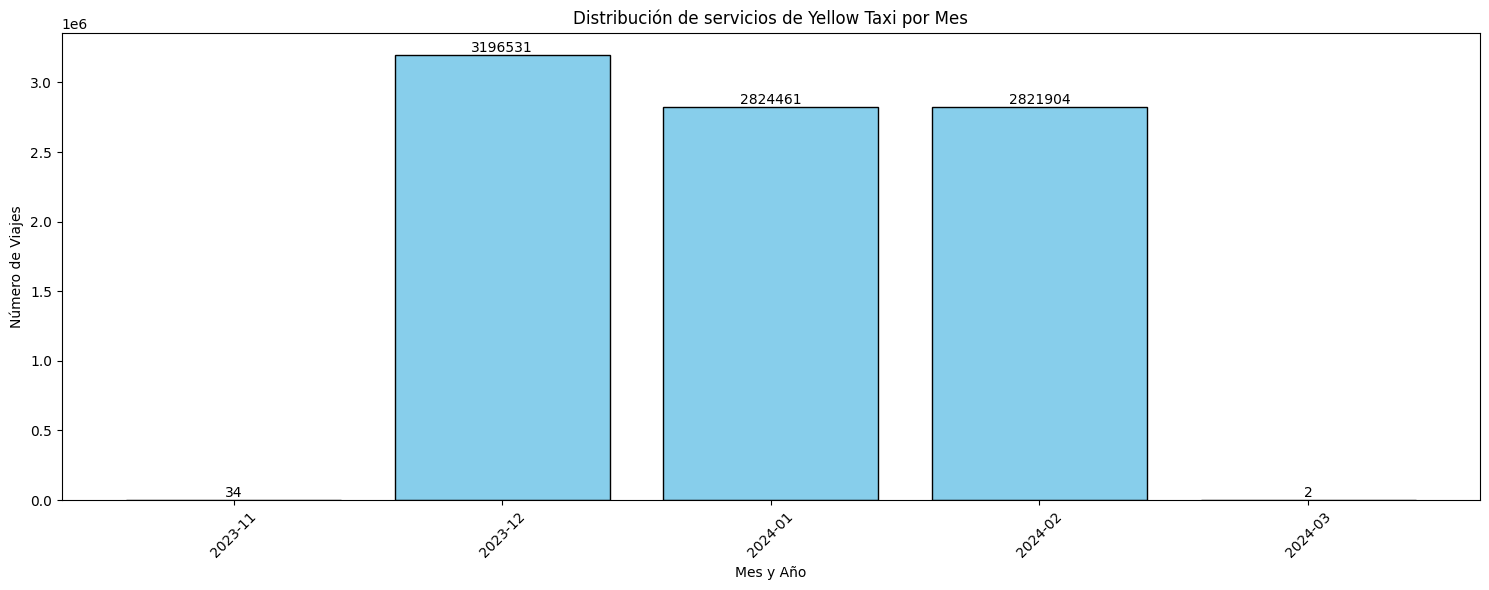

In [167]:
# Convertir la columna 'tpep_pickup_datetime' a tipo datetime
yellow_taxi['tpep_pickup_datetime'] = pd.to_datetime(yellow_taxi['tpep_pickup_datetime'])

# Extraer el mes y el año de la fecha de recogida
yellow_taxi['pickup_month'] = yellow_taxi['tpep_pickup_datetime'].dt.strftime('%Y-%m')

# Contar la cantidad de recogidas por cada mes y año
monthly_pickups = yellow_taxi['pickup_month'].value_counts().sort_index()

# Crear el histograma
plt.figure(figsize=(15, 6))
plt.bar(monthly_pickups.index, monthly_pickups.values, color='skyblue', edgecolor='black')

# Añadir título y etiquetas a los ejes
plt.title('Distribución de servicios de Yellow Taxi por Mes')
plt.xlabel('Mes y Año')
plt.ylabel('Número de Viajes')
plt.xticks(rotation=45) # Rotar las etiquetas para mejor visualización
# plt.yscale('log')  # Escala logarítmica en el eje y

# Mostrar las etiquetas en las barras
for i, value in enumerate(monthly_pickups.values):
    plt.text(i, value, str(value), ha='center', va='bottom')

# Mostrar el histograma
plt.tight_layout() # Ajustar la disposición para evitar la superposición de etiquetas
plt.show()


Es importante mencionar que se localizaron inconsistencia con 45 registros que presentan viajes con una duración mayor o igual a 1 día. Lo cual podria deberse a una error del sistema o por algun error humano. Todos los registros son provenientes de  `VeriFone Inc`.

De esos registros puede observarse que el de menor duración es de 1 día y el de mayor duración fue de 6 días.

In [80]:
d = yellow_taxi[(yellow_taxi['tpep_dropoff_datetime'] - yellow_taxi['tpep_pickup_datetime']) >= pd.Timedelta(days=1)]
d['duracion'] = d['tpep_dropoff_datetime'] - d['tpep_pickup_datetime']
print(f"Se indentifican {d['Airport_fee'].count()} registros que tienen una duración mayor o igual a 1 día. Todos ellos provenientes del proveedor {vendor[d['VendorID'].unique()[0]]}")
print(f"De estos registros anomalos puede verse que el de menor duración es de {d['duracion'].min()} y el de mayor duración es de {d['duracion'].max()} ")

Se indentifican 45 registros que tienen una duración mayor o igual a 1 día. Todos ellos provenientes del proveedor VeriFone Inc.
De estos registros anomalos puede verse que el de menor duración es de 1 days 00:06:05 y el de mayor duración es de 6 days 13:35:24 


C:\Users\stdio\AppData\Local\Temp\ipykernel_7508\3814628818.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['duracion'] = d['tpep_dropoff_datetime'] - d['tpep_pickup_datetime']


El gráfico muestra la **distribución de pasajeros** en viajes de taxis amarillos. La mayoría de los viajes son de **un solo pasajero**, con una frecuencia de más de seis millones. Los viajes con **seis pasajeros** son los menos comunes. Esto indica que los viajes individuales son mucho más frecuentes que los grupales.

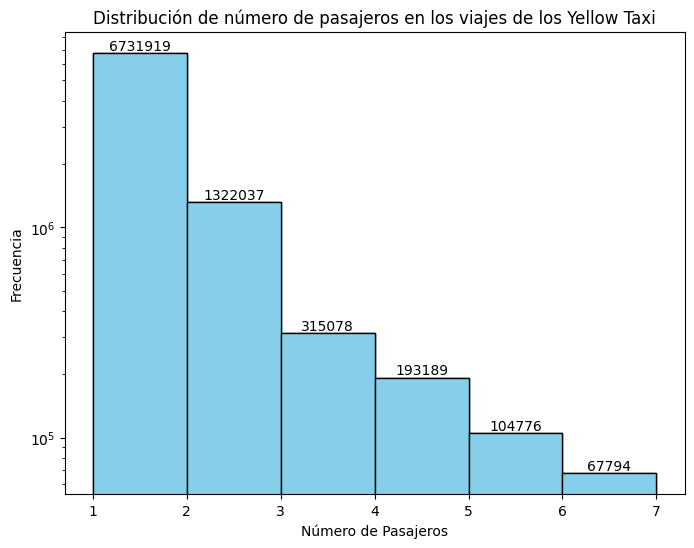

In [89]:
# Crear el histograma
plt.figure(figsize=(8, 6))
plt.hist(yellow_taxi['passenger_count'], bins=range(1, 8), edgecolor='black', color='skyblue')

# Añadir título y etiquetas a los ejes
plt.title('Distribución de número de pasajeros en los viajes de los Yellow Taxi')
plt.xlabel('Número de Pasajeros')
plt.ylabel('Frecuencia')
plt.yscale('log')  # Escala logarítmica en el eje y

# Obtener las alturas de las barras
heights, bins, _ = plt.hist(yellow_taxi['passenger_count'], bins=range(1, 8), edgecolor='black', color='skyblue')

# Agregar las etiquetas de los valores en el centro de cada barra
for i, value in enumerate(heights):
    plt.text(bins[i] + 0.5, value, str(int(value)), ha='center', va='bottom')

# Mostrar el histograma
plt.show()

La variable `trip_distance` incluye valores atípicos, evidenciados por un viaje registrado de **161,726.1 millas**, media de **3.33 millas** y desviación estándar de **84.85 millas**. Para preservar la integridad estadística, se optará por excluir estos datos extremos que podrían sesgar el análisis.

In [151]:
a = yellow_taxi['trip_distance'].describe()
IQR = a['75%'] - a['25%']
RI = a['25%'] - 1.5 * IQR       # RAngo inferior
if RI < 0:
 RI = 0
RS = a['75%'] + 1.5 * IQR       # Rango superior
rango = list(range(int(round(RI,0)), int(round(RS,0)) + 1, 1))
yellow_taxi['trip_disntance_range'] = pd.cut(yellow_taxi['trip_distance'], bins=rango)
print(f"La variable 'Trip_distance' tiene valores atipicos de acuerdo a la siguiente información: \nMedia {a['mean']} \nDesviacion estandar {a['std']}\nValor Máximo {a['max']} \nValor mínimo {a['min']}")

La variable 'Trip_distance' tiene valores atipicos de acuerdo a la siguiente información: 
Media 3.3377390327099623 
Desviacion estandar 84.85824386677807
Valor Máximo 161726.1 
Valor mínimo 0.0


La distribución de las distancias recorridas indica que los viajes de menos de una milla son frecuentes. Sin embargo, la mayoría de los trayectos oscilan entre 1 y 2 millas. Aunque hay una presencia notable de viajes dentro de este rango, aquellos que superan las 3 millas son relativamente raros.

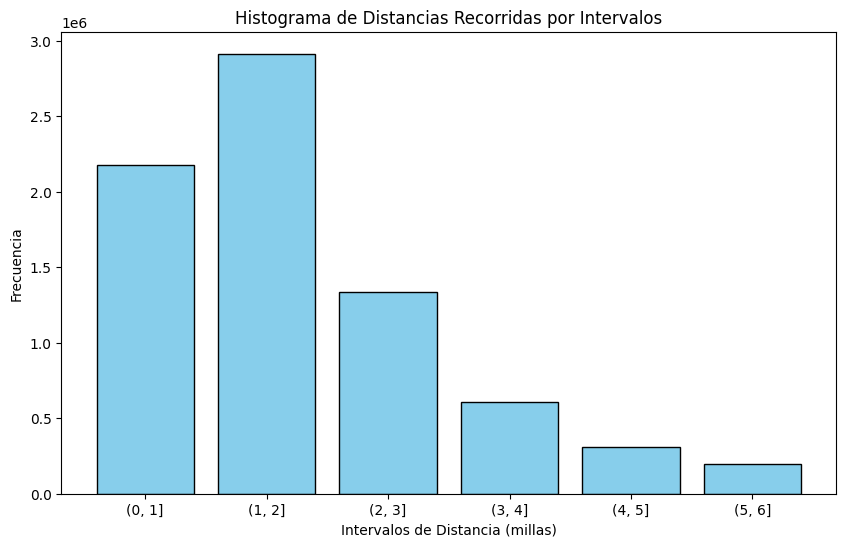

In [149]:
# Crear listas para los intervalos y sus frecuencias
intervals = [str(interval) for interval in yellow_taxi['trip_disntance_range'].value_counts().index]
frequencies = list(yellow_taxi['trip_disntance_range'].value_counts().values)

# Ordenar los intervalos y frecuencias para que coincidan
sorted_indices = sorted(range(len(intervals)), key=lambda k: intervals[k])
intervals = [intervals[i] for i in sorted_indices]
frequencies = [frequencies[i] for i in sorted_indices]

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(intervals, frequencies, color='skyblue', edgecolor='black')

# Añadir título y etiquetas a los ejes
plt.title('Distribución de Distancias Recorridas por Intervalos')
plt.xlabel('Intervalos de Distancia (millas)')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()


Importe total cobrado muestra algunos valores atipicos, como por ejemplo un valor **mínimo de -$1094.05**, **máximo de $5000**, una **desviación estándar de $23.56** y **media de $27.44**, por lo que se decide trabajar con un rango mas adecuado de valores

In [159]:
a = yellow_taxi['total_amount'].describe()
IQR = a['75%'] - a['25%']
RI = a['25%'] - 1.5 * IQR       # RAngo inferior
if RI < 0:
 RI = 0
RS = a['75%'] + 1.5 * IQR       # Rango superior
rango = list(range(int(round(RI,0)), int(round(RS,0)) + 1, 10))
yellow_taxi['total_amount_range'] = pd.cut(yellow_taxi['total_amount'], bins=rango)
print(f"La variable 'total_amount' tiene valores atipicos de acuerdo a la siguiente información: \nMedia {a['mean']} \nDesviacion estandar {a['std']}\nValor Máximo {a['max']} \nValor mínimo {a['min']}")
RI , RS

La variable 'total_amount' tiene valores atipicos de acuerdo a la siguiente información: 
Media 27.44126213228825 
Desviacion estandar 23.563278394868142
Valor Máximo 5000.0 
Valor mínimo -1094.05


(0, 51.03)

La grafica de importes cobrados muestra que la mayoría de los cobros están en el rango de 0 a 10 dólares, con una frecuencia cercana a los 4 millones. Los cobros de 10 a 20 dólares tienen aproximadamente la mitad de esa frecuencia, y los rangos más altos muestran frecuencias significativamente menores, siendo los cobros de 40 a 50 dólares los menos frecuentes. Esto indica que los importes cobrados más bajos son mucho más comunes que los más altos.

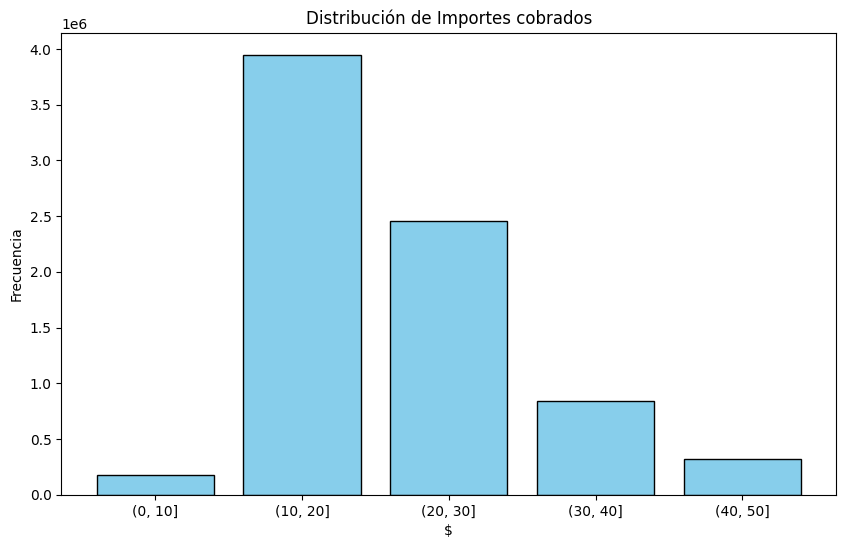

In [163]:
# Crear listas para los intervalos y sus frecuencias
intervals = [str(interval) for interval in yellow_taxi['total_amount_range'].value_counts().index]
frequencies = list(yellow_taxi['total_amount_range'].value_counts().values)

# Ordenar los intervalos y frecuencias para que coincidan
sorted_indices = sorted(range(len(intervals)), key=lambda k: intervals[k])
intervals = [intervals[i] for i in sorted_indices]
frequencies = [frequencies[i] for i in sorted_indices]

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(intervals, frequencies, color='skyblue', edgecolor='black')

# Añadir título y etiquetas a los ejes
plt.title('Distribución de Importes cobrados')
plt.xlabel('$')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

El gráfico ilustra cómo la demanda de taxis amarillos fluctúa a lo largo del día durante un período de tres meses, con el punto más bajo cerca de las 5 HRS. y el pico más alto alrededor de las 18 HRS. Este análisis nos permite ver que el comportamiento del cliente.

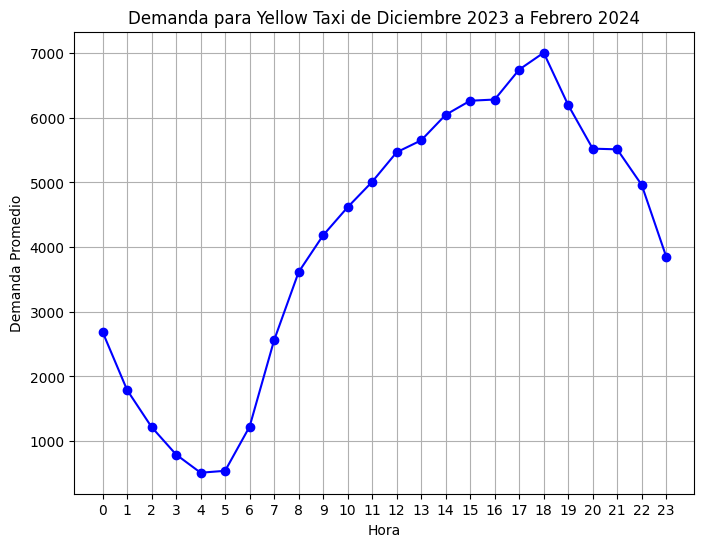

In [166]:
yellow_taxi['Hour_pickup'] = yellow_taxi['tpep_pickup_datetime'].dt.hour
demanda = yellow_taxi.groupby('Hour_pickup')[['Hour_pickup']].count()
demanda['trip_per_hour'] = demanda['Hour_pickup'] / 90
demanda = demanda.rename(columns={'Hour_pickup': 'Trips'})

# Crear la gráfica de líneas
plt.figure(figsize=(8, 6))
plt.plot(demanda.index, demanda['trip_per_hour'], marker='o', linestyle='-', color='b')
plt.title('Demanda para Yellow Taxi de Diciembre 2023 a Febrero 2024')
plt.xlabel('Hora')
plt.ylabel('Demanda Promedio')
plt.grid(True)
plt.xticks(range(0, 24))
plt.show()
